# Object Oriented Programming (OOP): Creating a Financial Instrument Class

## An example Class: pandas.DataFrame
Goal: handling and manipulating any Tabular Data (efficiently)

In [5]:
import pandas as pd

__Instantiation__

In [8]:
# instantiation(인스턴스화) : 클래스를 객체로 만드는 과정
df = pd.read_csv("titanic.csv")
# pandas.DataFrame 클래스의 구체적인 특정 객체 생성

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


In [10]:
type(df)

pandas.core.frame.DataFrame

__Attributes__

In [11]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'deck'],
      dtype='object')

In [12]:
df.shape

(891, 9)

__Methods__

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   fare      891 non-null    float64
 7   embarked  889 non-null    object 
 8   deck      203 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


In [14]:
df.sort_values(by = "age", ascending = False)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,deck
630,1,1,male,80.0,0,0,30.0000,S,A
851,0,3,male,74.0,0,0,7.7750,S,NaN
493,0,1,male,71.0,0,0,49.5042,C,NaN
96,0,1,male,71.0,0,0,34.6542,C,A
116,0,3,male,70.5,0,0,7.7500,Q,NaN
...,...,...,...,...,...,...,...,...,...
859,0,3,male,NaN,0,0,7.2292,C,NaN
863,0,3,female,NaN,8,2,69.5500,S,NaN
868,0,3,male,NaN,0,0,9.5000,S,NaN
878,0,3,male,NaN,0,0,7.8958,S,NaN


## The FinancialInstrument Class live in action (Part 1)
Goal: Analyzing Financial Instruments (e.g. stocks) efficiently

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_26291/2987081128.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [16]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self.ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Instantiation__

In [17]:
stock = FinancialInstrument(ticker = "AAPL", start = "2015-01-01", end =  "2019-12-31" ) # instantiation

[*********************100%***********************]  1 of 1 completed


In [18]:
stock

FinancialInstrument(ticker = AAPL, start = 2015-01-01, end = 2019-12-31)

In [19]:
type(stock)

__main__.FinancialInstrument

__Attributes__

In [ ]:
#stock.

In [20]:
stock.ticker

'AAPL'

In [21]:
stock.start

'2015-01-01'

In [22]:
stock.end

'2019-12-31'

In [24]:
stock.data.head()

,price,log_returns
Date,,
2015-01-02,27.332500,NaN
2015-01-05,26.562500,-0.028576
2015-01-06,26.565001,0.000094
2015-01-07,26.937500,0.013925
2015-01-08,27.972500,0.037703


__Methods__

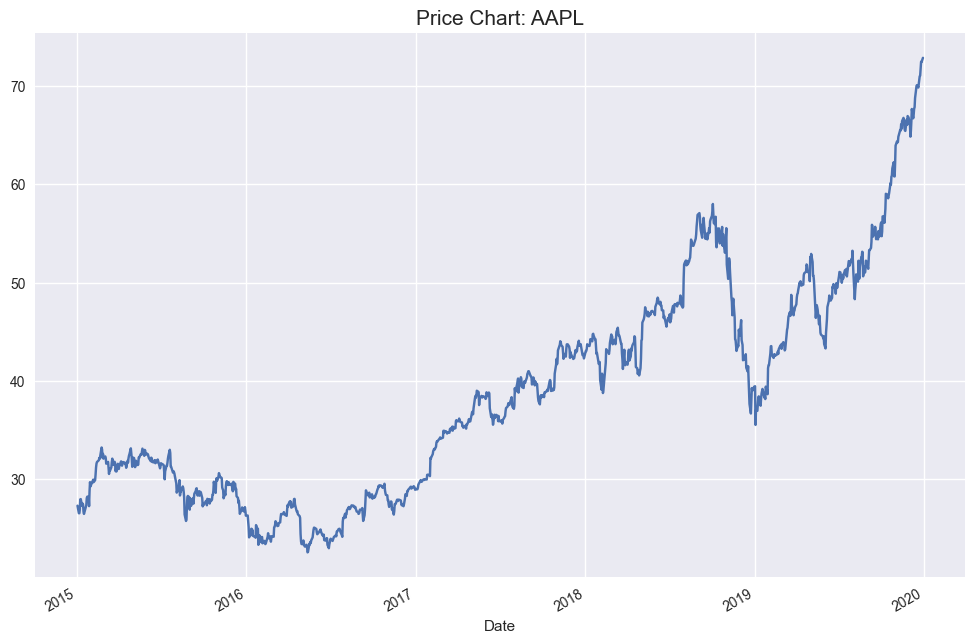

In [25]:
stock.plot_prices()

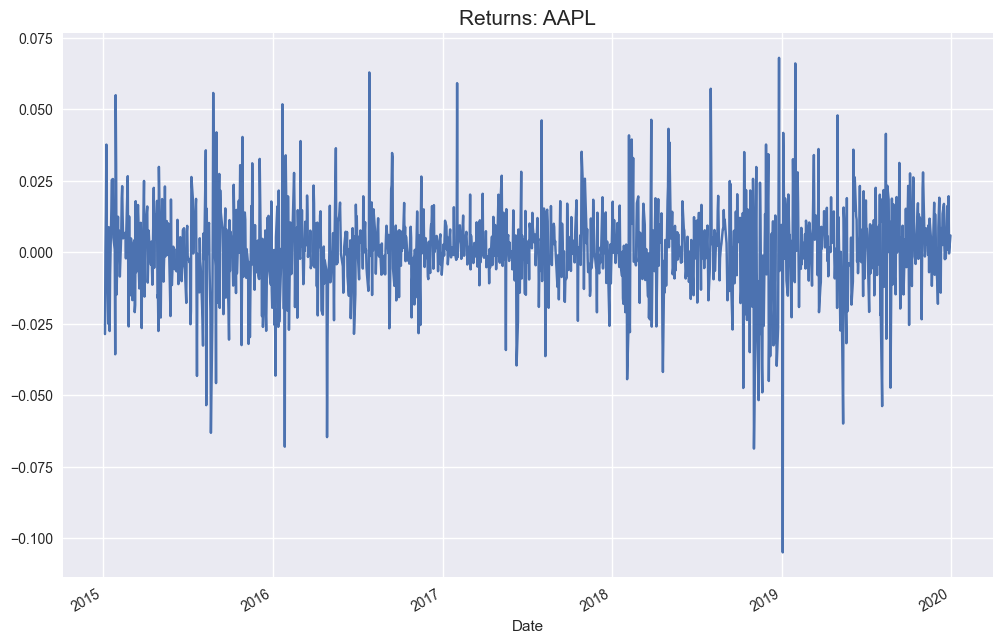

In [26]:
stock.plot_returns()

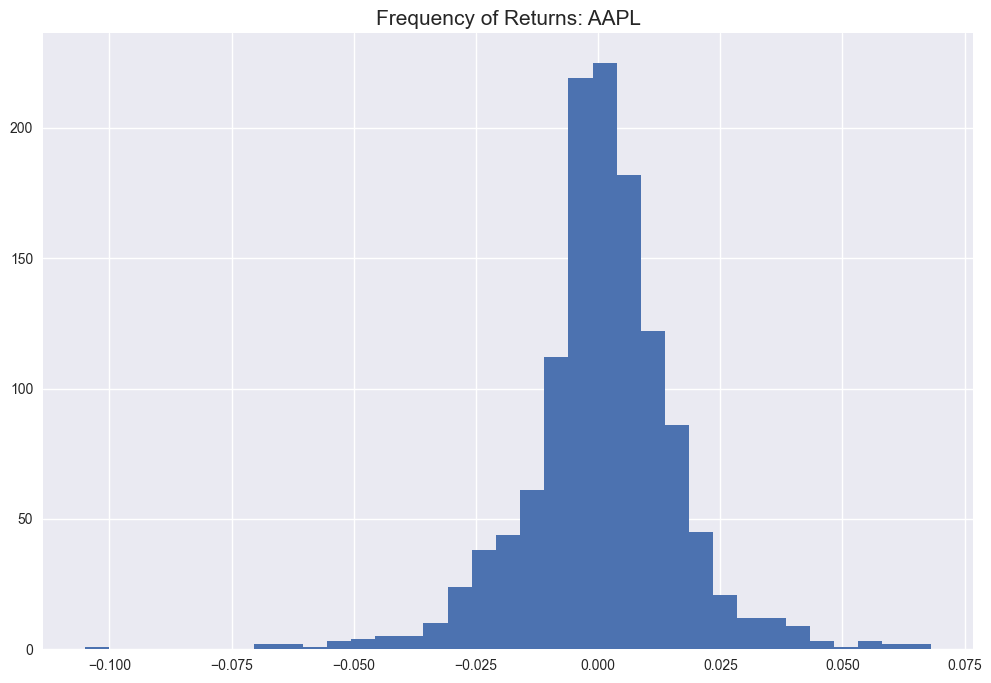

In [27]:
stock.plot_returns(kind = "hist")

## The FinancialInstrument Class live in action (Part 2)

__More Methods__

In [28]:
stock.mean_return()

0.0007808421402793629

In [39]:
stock.data.log_returns.head()

Date
2015-01-02         NaN
2015-01-05   -0.018527
2015-01-06   -0.021780
2015-01-07    0.000415
2015-01-08    0.011971
Name: log_returns, dtype: float64

In [29]:
stock.data.log_returns.mean()

0.0007808421402793629

In [30]:
stock.mean_return(freq = "w")

0.0037576158168232733

In [31]:
stock.std_returns()

0.01569292603658385

In [32]:
stock.std_returns(freq = "w")

0.03478401611459764

In [33]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [40]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


In [41]:
stock.ticker

'GE'

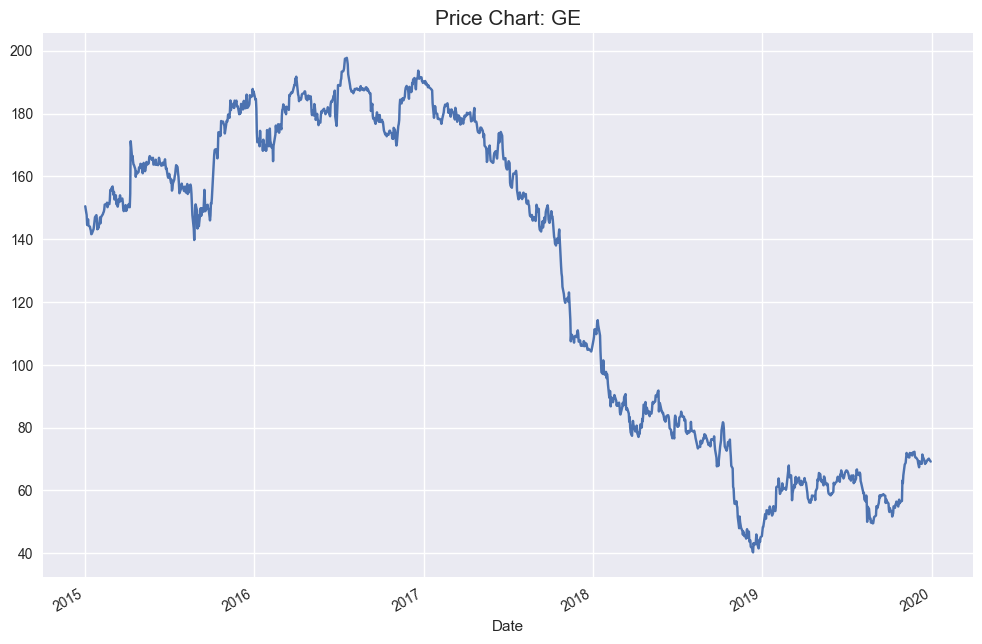

In [42]:
stock.plot_prices()

In [43]:
stock.annualized_perf()

Return: -0.156 | Risk: 0.298


## Building the FinancialInstrument Class from scratch: Instantiation

In [44]:
class FinancialInstrument():
    pass

In [45]:
stock = FinancialInstrument() # instantiation

In [46]:
stock # 객체 생성

In [47]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

In [48]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31") # instantiation

In [49]:
stock

In [50]:
stock.ticker

'AAPL'

In [51]:
stock.end

'2019-12-31'

In [52]:
stock.start

'2015-01-01'

## The method get_data()

In [ ]:
yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

In [ ]:
raw = yf.download("AAPL", "2015-01-01", "2019-12-31").Close.to_frame()

In [ ]:
raw.rename(columns = {"Close":"price"}, inplace = True)

In [ ]:
raw

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw

In [ ]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [ ]:
stock.ticker

In [ ]:
stock.data

## The method log_returns()

In [ ]:
stock.data

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [ ]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [ ]:
stock.data

In [ ]:
stock.log_returns()

## (String) Representation

In [ ]:
stock

In [ ]:
print(stock)

In [ ]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self):
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker,
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))

In [ ]:
stock = FinancialInstrument("AAPL", "2015-01-01", "2019-12-31")

In [ ]:
stock

In [ ]:
print(stock)

## The methods plot_prices() and plot_returns()

In [ ]:
stock

In [ ]:
stock.data

In [ ]:
stock.data.price.plot()
plt.show()

In [ ]:
stock.data.log_returns.plot()
plt.show()

In [ ]:
stock.data.log_returns.hist(bins = 100)
plt.show()

In [60]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self.ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self.ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (10, 6))
        plt.title("Price Chart: {}".format(self.ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (10, 6))
            plt.title("Returns: {}".format(self.ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (10, 6), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self.ticker), fontsize = 15)  

In [61]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


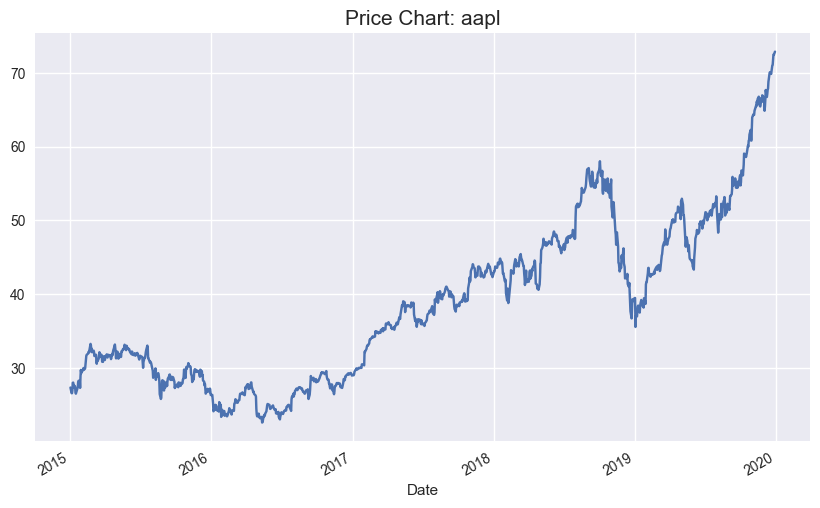

In [62]:
stock.plot_prices()

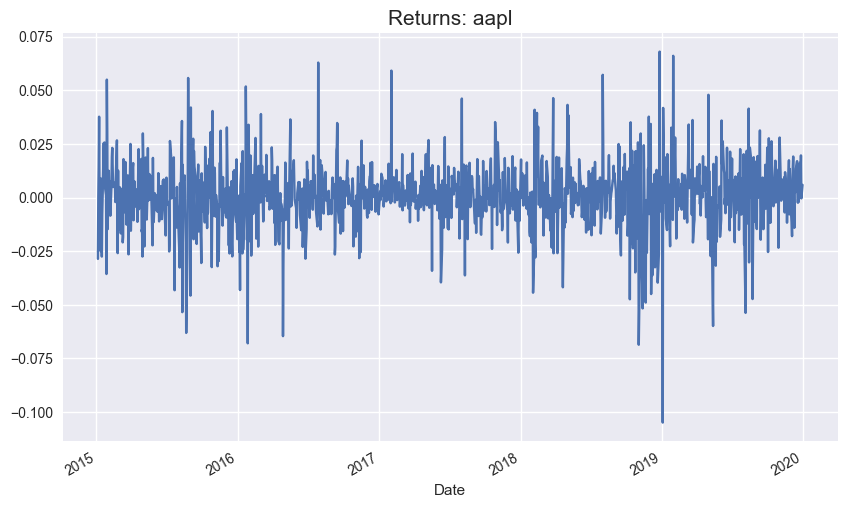

In [63]:
stock.plot_returns()

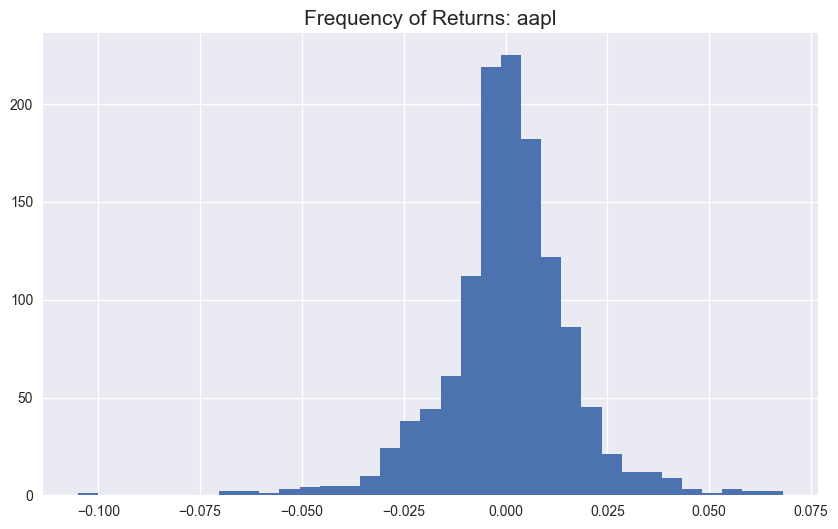

In [64]:
stock.plot_returns(kind = "hist")

## Encapsulation

In [65]:
stock

FinancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

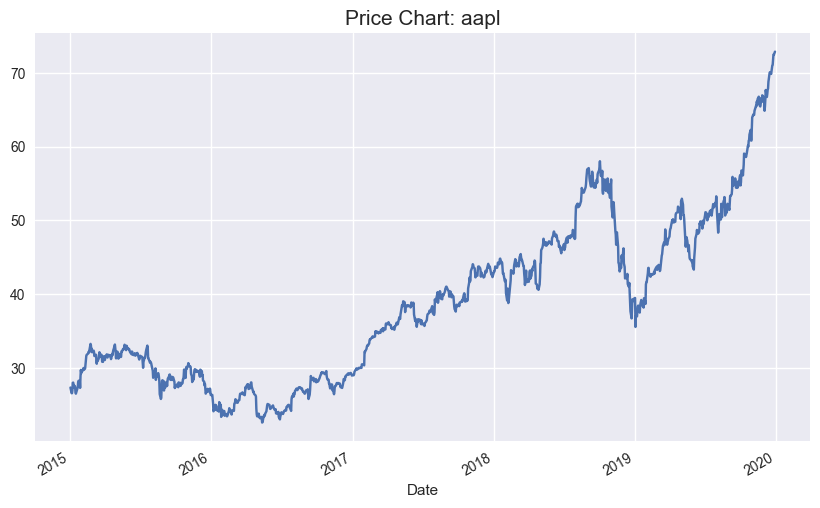

In [66]:
stock.plot_prices()

In [67]:
stock.ticker

'aapl'

In [68]:
stock.ticker = "GE"

In [69]:
stock.ticker

'GE'

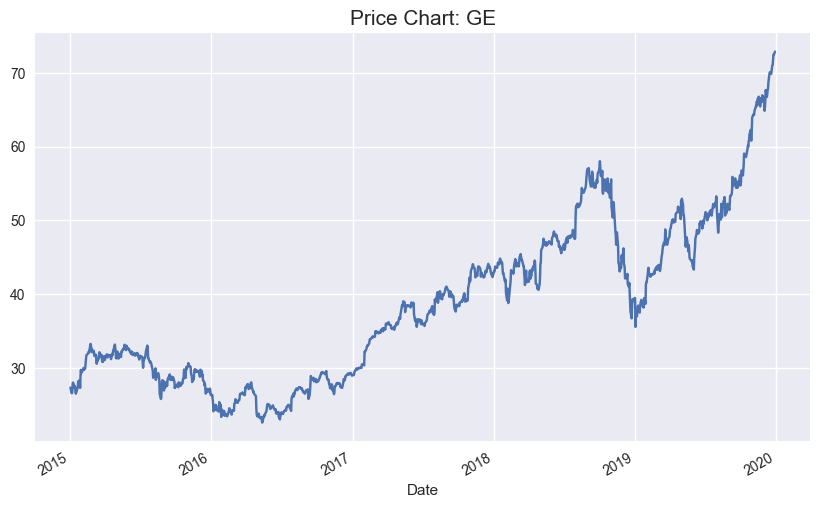

In [70]:
stock.plot_prices() # 여전히 AAPL의 그래프가 나옴

In [71]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker # _ticker로 해당 문제 해결
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame() # 여기
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15) # 여기
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15) #여기
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)

In [72]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [73]:
stock

FinancialInstrument(ticker = aapl, start = 2015-01-01, end = 2019-12-31)

In [74]:
stock.ticker #ticker가 없다.

AttributeError: 'FinancialInstrument' object has no attribute 'ticker'

In [75]:
stock._ticker # 100% 보호할 수 없기에 이렇게하면 되긴한다. python에선 그럼

'aapl'

## The method set_ticker()

In [76]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data() # 다시 불러와야 한다.
            self.log_returns() # 22

In [77]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


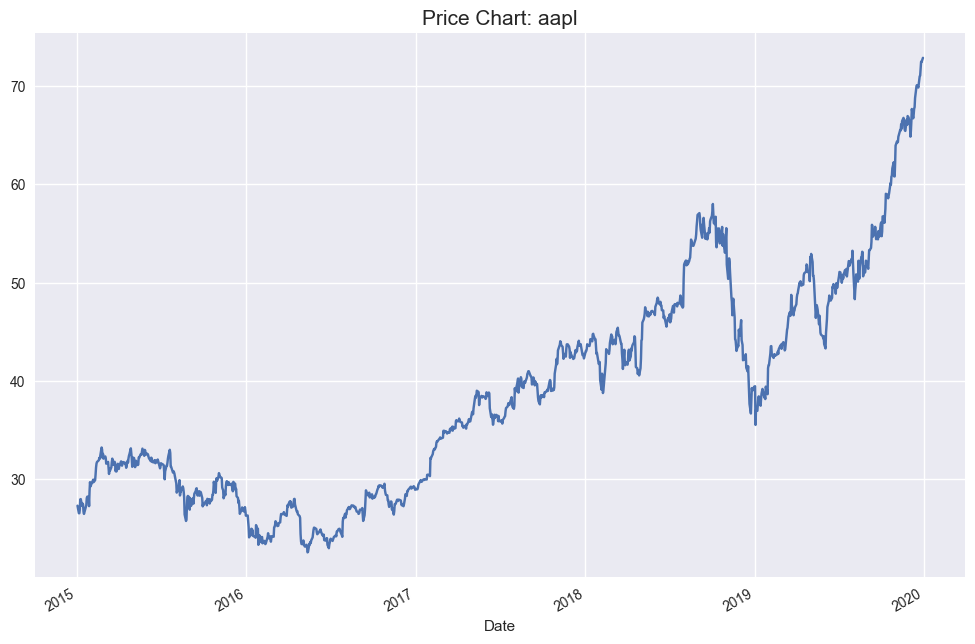

In [78]:
stock.plot_prices()

In [79]:
stock.set_ticker("GE")

[*********************100%***********************]  1 of 1 completed


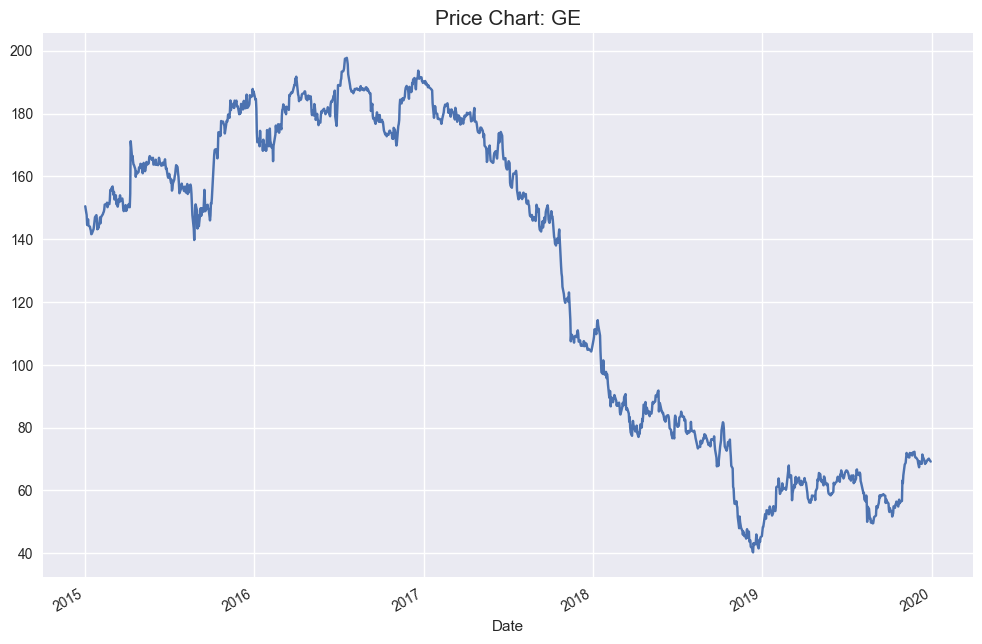

In [80]:
stock.plot_prices()

## Adding more methods and performance metrics

In [81]:
class FinancialInstrument():
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last() # 월간 종가를 택한다.
            resampled_returns = np.log(resampled_price / resampled_price.shift(1)) # 월간 수익률
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [82]:
stock = FinancialInstrument("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [93]:
stock.mean_return() # 일간 수익률 평균

0.0007808421402793629

In [84]:
stock.mean_return("m") # 월간 수익률 평균

0.015450305477429897

In [85]:
stock.mean_return("y")

0.25466876904120006

In [86]:
stock.std_returns()

0.01569292603658385

In [90]:
stock.std_returns("y")

0.3031286167641461

In [91]:
stock.annualized_perf() # 일간 수익율 평균 * 252, 일간 변동성의 표준편차 * 252

Return: 0.197 | Risk: 0.249


## Inheritance

In [94]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)

    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [95]:
class RiskReturn(FinancialInstrumentBase): # Child
    
    def __repr__(self): # child class 안에서 다시 정의해야 한다.
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [96]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31")

[*********************100%***********************]  1 of 1 completed


In [97]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


In [99]:
print(stock.data.head())

                price  log_returns
Date                              
2015-01-02  27.332500          NaN
2015-01-05  26.562500    -0.028576
2015-01-06  26.565001     0.000094
2015-01-07  26.937500     0.013925
2015-01-08  27.972500     0.037703


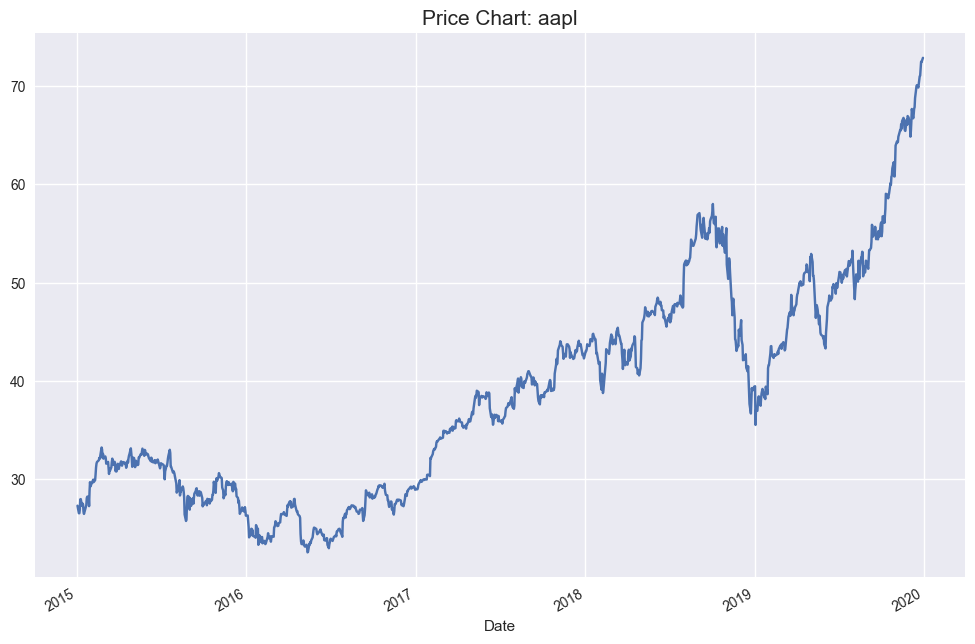

In [100]:
stock.plot_prices()

In [101]:
stock.set_ticker("ge")

[*********************100%***********************]  1 of 1 completed


In [102]:
stock

RiskReturn(ticker = ge, start = 2015-01-01, end = 2019-12-31)

In [103]:
stock.mean_return("w")

-0.0029766689871473986

## Inheritance and the super() Function

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use("seaborn")

/var/folders/k8/xm42xp_16cs6fgtvp6ymr9l40000gn/T/ipykernel_26291/2987081128.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [105]:
class FinancialInstrumentBase(): # Parent
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()

In [106]:
class RiskReturn(FinancialInstrumentBase): # Child
    
    def __init__(self, ticker, start, end, freq = None): # 다시 정의해야 한다.
        self.freq = freq # child에서 추가된 변수
        super().__init__(ticker, start, end) # 부모 클래스의 __init__ 함수를 호출한다. parent class의 __init__을 overridding한다.
    
    def __repr__(self): 
        return "RiskReturn(ticker = {}, start = {}, end = {})".format(self._ticker, self.start, self.end)

    def mean_return(self):
        if self.freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self):
        if self.freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(self.freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

In [107]:
stock = RiskReturn("aapl", "2015-01-01", "2019-12-31", freq = "w")

[*********************100%***********************]  1 of 1 completed


In [108]:
stock.freq

'w'

In [109]:
stock._ticker

'aapl'

In [114]:
print(stock.data.head())

                price  log_returns
Date                              
2015-01-02  27.332500          NaN
2015-01-05  26.562500    -0.028576
2015-01-06  26.565001     0.000094
2015-01-07  26.937500     0.013925
2015-01-08  27.972500     0.037703


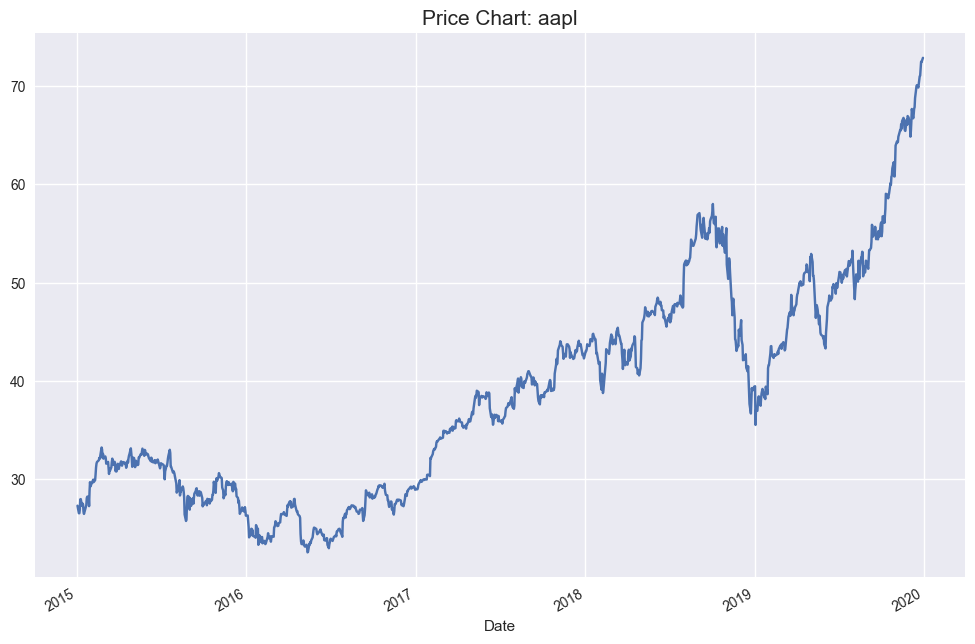

In [111]:
stock.plot_prices()

In [112]:
stock.mean_return()

0.0037576158168232733

In [113]:
stock.annualized_perf()

Return: 0.197 | Risk: 0.249


## Docstrings

In [115]:
class FinancialInstrument():
    ''' Class to analyze Financial Instruments like stocks
    '''
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or as histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))

__Final Version__

In [ ]:
class FinancialInstrument():
    ''' Class for analyzing Financial Instruments like stocks.

    Attributes
    ==========
    ticker: str
        ticker symbol with which to work with
    start: str
        start date for data retrieval
    end: str
        end date for data retrieval

    Methods
    =======
    get_data:
        retrieves daily price data (from yahoo finance) and prepares the data
    log_returns:
        calculates log returns
    plot_prices:
        creates a price chart
    plot_returns:
        plots log returns either as time series ("ts") or histogram ("hist")
    set_ticker:
        sets a new ticker
    mean_return:
        calculates mean return
    std_returns:
        calculates the standard deviation of returns (risk)
    annualized_perf:
        calculates annulized return and risk
    '''
    
    def __init__(self, ticker, start, end):
        self._ticker = ticker
        self.start = start
        self.end = end
        self.get_data()
        self.log_returns()
    
    def __repr__(self): 
        return "FinancialInstrument(ticker = {}, start = {}, end = {})".format(self._ticker, 
                                                                               self.start, self.end)
    def get_data(self):
        ''' retrieves (from yahoo finance) and prepares the data
        '''
        raw = yf.download(self._ticker, self.start, self.end).Close.to_frame()
        raw.rename(columns = {"Close":"price"}, inplace = True)
        self.data = raw
        
    def log_returns(self):
        '''calculates log returns
        '''
        self.data["log_returns"] = np.log(self.data.price/self.data.price.shift(1))
        
    def plot_prices(self):
        ''' creates a price chart
        '''
        self.data.price.plot(figsize = (12, 8))
        plt.title("Price Chart: {}".format(self._ticker), fontsize = 15)
    
    def plot_returns(self, kind = "ts"):
        ''' plots log returns either as time series ("ts") or histogram ("hist")
        '''
        if kind == "ts":
            self.data.log_returns.plot(figsize = (12, 8))
            plt.title("Returns: {}".format(self._ticker), fontsize = 15)
        elif kind == "hist":
            self.data.log_returns.hist(figsize = (12, 8), bins = int(np.sqrt(len(self.data))))
            plt.title("Frequency of Returns: {}".format(self._ticker), fontsize = 15)
    
    def set_ticker(self, ticker = None):
        '''sets a new ticker
        '''
        if ticker is not None:
            self._ticker = ticker
            self.get_data()
            self.log_returns()
            
    def mean_return(self, freq = None):
        '''calculates mean return
        '''
        if freq is None:
            return self.data.log_returns.mean()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.mean()
    
    def std_returns(self, freq = None):
        '''calculates the standard deviation of returns (risk)
        '''
        if freq is None:
            return self.data.log_returns.std()
        else:
            resampled_price = self.data.price.resample(freq).last()
            resampled_returns = np.log(resampled_price / resampled_price.shift(1))
            return resampled_returns.std()
        
    def annualized_perf(self):
        '''calculates annulized return and risk
        '''
        mean_return = round(self.data.log_returns.mean() * 252, 3)
        risk = round(self.data.log_returns.std() * np.sqrt(252), 3)
        print("Return: {} | Risk: {}".format(mean_return, risk))